<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final project - Data Visualization
</div>

## **Thông tin nhóm**

#### Thành viên 1:
##### * **Họ và tên:** Võ Duy Anh
##### * **MSSV:** 21127221

#### Thành viên 2:
##### * **Họ và tên:** Nguyễn Mậu Gia Bảo
##### * **MSSV:** 21127583

#### Thành viên 3:
##### * **Họ và tên:** Vũ Minh Phát
##### * **MSSV:** 21127739

### **Thư viện hỗ trợ**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

### **1. Giới thiệu về bộ dữ liệu**

### **2. Khám phá dữ liệu**

#### Đọc dữ liệu từ file

In [2]:
data = pd.read_csv("hotel_bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


#### 📌 Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
row,col = data.shape
print(f'Dữ liệu có {row} dòng và {col} cột')

Dữ liệu có 119390 dòng và 32 cột


#### 📌 Ý nghĩa của mỗi dòng là gì?

Biểu diễn một đơn đặt phòng khách sạn cụ thể

####  📌 Dữ liệu có các dòng bị lặp không?

In [4]:
detectDupSeries = data.duplicated(keep='first')
num_duplicated_rows = detectDupSeries.sum()

if num_duplicated_rows == 0:
    print("Dữ liệu không có dòng bị trùng lặp!")
else:
    print(f"Dữ liệu có {num_duplicated_rows} dòng bị trùng lặp.")

Dữ liệu có 31994 dòng bị trùng lặp.


In [5]:
duplicate_ratio = num_duplicated_rows / len(data)
print(f"Tỷ lệ trùng lặp của dữ liệu là: {duplicate_ratio:.2%}")

Tỷ lệ trùng lặp của dữ liệu là: 26.80%


Nhìn chung, với tỉ lệ trùng lặp hơn 26% có thể thấy bộ dữ liệu đang có tỉ lệ trùng lặp khá lớn.

Loại bỏ các dòng trùng lặp

In [6]:
data = data.drop_duplicates()

#### 📌 Ý nghĩa của mỗi cột là gì?

<table style="width: 100%; border-collapse: collapse;">
  <thead>
    <tr>
      <th style="min-width: 10px; width: 30px; background-color: #04B1CC; color: white; font-size :15px; font-weight: bold; text-align: left; padding: 8px;">STT</th>
      <th style="background-color: #04B1CC; color: white; font-size :15px; font-weight: bold; text-align: left; padding: 8px;">Cột</th>
      <th style="background-color: #04B1CC; color: white; font-size :15px; font-weight: bold; text-align: left; padding: 8px;">Ý nghĩa</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="font-size: 14px; text-align: left;">1</td>
      <td style="font-size: 14px; text-align: left;">hotel</td>
      <td style="font-size: 14px; text-align: left;">Loại khách sạn, nhận một trong hai giá trị: "City Hotel" hoặc "Resort Hotel".</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">2</td>
      <td style="font-size: 14px; text-align: left;">is_canceled</td>
      <td style="font-size: 14px; text-align: left;">Giá trị nhị phân cho biết việc đặt phòng có bị hủy hay không (0 nếu không hủy, 1 nếu đã hủy).</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">3</td>
      <td style="font-size: 14px; text-align: left;">lead_time</td>
      <td style="font-size: 14px; text-align: left;">Số ngày (chênh lệch) giữa ngày đặt phòng và ngày đến.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">4</td>
      <td style="font-size: 14px; text-align: left;">arrival_date_year</td>
      <td style="font-size: 14px; text-align: left;"> Năm của ngày đến.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">5</td>
      <td style="font-size: 14px; text-align: left;">arrival_date_month</td>
      <td style="font-size: 14px; text-align: left;">Tháng của ngày đến.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">6</td>
      <td style="font-size: 14px; text-align: left;">arrival_date_week_number</td>
      <td style="font-size: 14px; text-align: left;">Tuần trong năm của ngày đến.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">7</td>
      <td style="font-size: 14px; text-align: left;">arrival_date_day_of_month</td>
      <td style="font-size: 14px; text-align: left;">Ngày trong tháng của ngày đến.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">8</td>
      <td style="font-size: 14px; text-align: left;">stays_in_weekend_nights</td>
      <td style="font-size: 14px; text-align: left;">Số đêm cuối tuần (thứ bảy hoặc chủ nhật) mà khách lưu trú.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">9</td>
      <td style="font-size: 14px; text-align: left;">stays_in_week_nights</td>
      <td style="font-size: 14px; text-align: left;">Số đêm lưu trú vào các ngày trong tuần (thứ hai đến thứ sáu).</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">10</td>
      <td style="font-size: 14px; text-align: left;">adults</td>
      <td style="font-size: 14px; text-align: left;">Số lượng người lớn (được bao gồm trong mỗi lần đặt phòng).</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">11</td>
      <td style="font-size: 14px; text-align: left;">children</td>
      <td style="font-size: 14px; text-align: left;">Số lượng trẻ em (được bao gồm trong mỗi lần đặt phòng).</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">12</td>
      <td style="font-size: 14px; text-align: left;">babies</td>
      <td style="font-size: 14px; text-align: left;">Số lượng em bé (được bao gồm trong mỗi lần đặt phòng).</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">13</td>
      <td style="font-size: 14px; text-align: left;">meal</td>
      <td style="font-size: 14px; text-align: left;">Loại bữa ăn đã đặt.</td>
    </tr>
     <tr>
      <td style="font-size: 14px; text-align: left;">14</td>
      <td style="font-size: 14px; text-align: left;">country</td>
      <td style="font-size: 14px; text-align: left;">Quốc gia của khách hàng.</td>
    </tr>
     <tr>
      <td style="font-size: 14px; text-align: left;">15</td>
      <td style="font-size: 14px; text-align: left;">market_segment</td>
      <td style="font-size: 14px; text-align: left;">Phân khúc thị trường của khách hàng.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">16</td>
      <td style="font-size: 14px; text-align: left;">distribution_channel</td>
      <td style="font-size: 14px; text-align: left;">Phương thức hoặc kênh mà qua đó yêu cầu đặt phòng được thực hiện.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">17</td>
      <td style="font-size: 14px; text-align: left;">is_repeated_guest</td>
      <td style="font-size: 14px; text-align: left;">Giá trị nhị phân cho biết khách hàng đã từng lưu trú trước đó hay chưa (1: đã từng; 0: chưa từng).</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">18</td>
      <td style="font-size: 14px; text-align: left;">previous_cancellations</td>
      <td style="font-size: 14px; text-align: left;">Số lần hủy đặt phòng trước đó.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">19</td>
      <td style="font-size: 14px; text-align: left;">previous_bookings_not_canceled</td>
      <td style="font-size: 14px; text-align: left;">Số lần đặt phòng trước đó nhưng không bị hủy.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">20</td>
      <td style="font-size: 14px; text-align: left;">reserved_room_type</td>
      <td style="font-size: 14px; text-align: left;">Mã loại phòng mà khách đã đặt.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">21</td>
      <td style="font-size: 14px; text-align: left;">assigned_room_type</td>
      <td style="font-size: 14px; text-align: left;">Mã loại phòng được chỉ định khi khách nhận phòng.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">22</td>
      <td style="font-size: 14px; text-align: left;">booking_changes</td>
      <td style="font-size: 14px; text-align: left;">Số lượng thay đổi/sửa đổi được thực hiện đối với việc đặt phòng.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">23</td>
      <td style="font-size: 14px; text-align: left;">deposit_type</td>
      <td style="font-size: 14px; text-align: left;">Loại tiền đặt cọc (phải trả để đặt phòng).</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">24</td>
      <td style="font-size: 14px; text-align: left;">agent</td>
      <td style="font-size: 14px; text-align: left;">ID (mã số) của đại lý đặt phòng.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">25</td>
      <td style="font-size: 14px; text-align: left;">company</td>
      <td style="font-size: 14px; text-align: left;">ID (mã số) của công ty đặt phòng.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">26</td>
      <td style="font-size: 14px; text-align: left;">days_in_waiting_list</td>
      <td style="font-size: 14px; text-align: left;">Số ngày mà một lượt đặt phòng đã nằm trong danh sách chờ của khách sạn.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">27</td>
      <td style="font-size: 14px; text-align: left;">customer_type</td>
      <td style="font-size: 14px; text-align: left;">Loại khách hàng.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">28</td>
      <td style="font-size: 14px; text-align: left;">adr</td>
      <td style="font-size: 14px; text-align: left;">Giá trung bình hàng đêm (Average Daily Rate).</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">29</td>
      <td style="font-size: 14px; text-align: left;">required_car_parking_spaces</td>
      <td style="font-size: 14px; text-align: left;">Số lượng chỗ đậu xe yêu cầu.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">30</td>
      <td style="font-size: 14px; text-align: left;">total_of_special_requests</td>
      <td style="font-size: 14px; text-align: left;">Tổng số yêu cầu đặc biệt.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">31</td>
      <td style="font-size: 14px; text-align: left;">reservation_status</td>
      <td style="font-size: 14px; text-align: left;">Trạng thái đặt phòng cuối cùng.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">32</td>
      <td style="font-size: 14px; text-align: left;">reservation_status_date</td>
      <td style="font-size: 14px; text-align: left;">Ngày cập nhật trạng thái đặt phòng cuối cùng.</td>
    </tr>
  </tbody>
</table>

#### 📌 Kiểu dữ liệu hiện tại của mỗi cột là gì? Có cột nào có kiểu dữ liệu không phù hợp không?

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

- `is_canceled` là cờ lệnh để thể hiện liệu đặt phòng có bị huỷ hay không, do đó cần chuyển về object để phân vào categorical.
- `children` chỉ số lượng trẻ em, do đó cần chuyển về dạng int64. Tuy nhiên vì dữ liệu đang chứa NULL, do đó sẽ chuyển về dạng int64 sau khi fill missing value.
- `is_repeated_guest` là cờ lệnh để thể hiện khách hàng có từng lưu trú ở đó không, do đó cần chuyển về object để phân vào categorical.
- `reservation_status_date` biểu diễn cho ngày cập nhật trạng thái đặt phòng cuối cùng, do đó cần chuyển về dạng datetime.

In [8]:
data['is_canceled'] = data['is_canceled'].astype(str)
data['is_repeated_guest'] = data['is_repeated_guest'].astype(str)
data["reservation_status_date"] = pd.to_datetime(data["reservation_status_date"])

#### 📌 Đối với mỗi cột có kiểu dữ liệu số, các giá trị được phân bố như thế nào?

📚 Đối với các cột có kiểu dữ liệu số, nhóm sẽ tính toán một số thống kê cơ bản:
- Tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu
- The min
- The lower quartile (phân vị 25)
- The median (phân vị 50)
- The upper quartile (phân vị 75)
- The max


In [9]:
num_col_info_df = data.select_dtypes(exclude=['object', 'bool'])

def missing_ratio(s):
    return (s.isna().mean() * 100)

def median(df):
    return (df.quantile(0.5))

def lower_quartile(df):
    return (df.quantile(0.25))

def upper_quartile(df):
    return (df.quantile(0.75))

num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df.T

,missing_ratio,min,lower_quartile,median,upper_quartile,max
lead_time,0.0,0.0,11.0,49.0,125.0,737.0
arrival_date_year,0.0,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,0.0,1.0,16.0,27.0,37.0,53.0
arrival_date_day_of_month,0.0,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,0.0,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,0.0,0.0,1.0,2.0,4.0,50.0
adults,0.0,0.0,2.0,2.0,2.0,55.0
children,0.004577,0.0,0.0,0.0,0.0,10.0
babies,0.0,0.0,0.0,0.0,0.0,10.0
previous_cancellations,0.0,0.0,0.0,0.0,0.0,26.0


- Cột `company` có tỉ lệ thiếu rất cao, lên đến hơn 90% (94.306893%), do đó nhóm sẽ tiến hành loại bỏ cột này.
- Cột `children` với tỉ lệ thiếu nhỏ, nhóm điền bằng giá trị mode của thuộc tính này.
- Cột `agent` với tỉ lệ thiếu khá cao, nhóm điền bằng giá trị median của thuộc tính này do giá trị của nó có phân bố rộng.

In [10]:
data.drop('company', axis=1, inplace=True)
data['children'].fillna(data['children'].mode()[0], inplace=True)
data['agent'].fillna(data['agent'].median(), inplace=True)
data['children'] = data['children'].astype(np.int64)

In [11]:
# TEST
data.select_dtypes(exclude=['object', 'bool']).agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"]).T

,missing_ratio,min,lower_quartile,median,upper_quartile,max
lead_time,0.0,0.0,11.0,49.0,125.0,737.0
arrival_date_year,0.0,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,0.0,1.0,16.0,27.0,37.0,53.0
arrival_date_day_of_month,0.0,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,0.0,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,0.0,0.0,1.0,2.0,4.0,50.0
adults,0.0,0.0,2.0,2.0,2.0,55.0
children,0.0,0.0,0.0,0.0,0.0,10.0
babies,0.0,0.0,0.0,0.0,0.0,10.0
previous_cancellations,0.0,0.0,0.0,0.0,0.0,26.0


#### 📌 Đối với mỗi cột có kiểu dữ liệu không phải là số, các giá trị được phân phối như thế nào?

📚 Đối với các cột có kiểu dữ liệu không phải là số, nhóm sẽ tính toán:
- Tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu
- Số lượng giá trị khác nhau
- Hiển thị một vài giá trị và phần trăm (từ 0 đến 100) của từng giá trị


In [12]:
cat_col_info_df = data.select_dtypes(include=['object', 'bool'])

def missing_ratio(s):
    return (s.isna().mean() * 100)

def num_values(s):
    return len(s.value_counts())

def value_ratios(s):
    totalCount = (~s.isna()).sum()
    return ((s.value_counts()/totalCount*100).round(1)).to_dict()

cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df.T

,missing_ratio,num_values,value_ratios
hotel,0.0,2,"{'City Hotel': 61.1, 'Resort Hotel': 38.9}"
is_canceled,0.0,2,"{'0': 72.5, '1': 27.5}"
arrival_date_month,0.0,12,"{'August': 12.9, 'July': 11.5, 'May': 9.6, 'Ap..."
meal,0.0,5,"{'BB': 77.8, 'SC': 10.8, 'HB': 10.4, 'Undefine..."
country,0.517186,177,"{'PRT': 31.6, 'GBR': 12.0, 'FRA': 10.2, 'ESP':..."
market_segment,0.0,8,"{'Online TA': 59.1, 'Offline TA/TO': 15.9, 'Di..."
distribution_channel,0.0,5,"{'TA/TO': 79.1, 'Direct': 14.9, 'Corporate': 5..."
is_repeated_guest,0.0,2,"{'0': 96.1, '1': 3.9}"
reserved_room_type,0.0,10,"{'A': 64.7, 'D': 19.9, 'E': 6.9, 'F': 3.2, 'G'..."
assigned_room_type,0.0,12,"{'A': 53.0, 'D': 25.7, 'E': 8.2, 'F': 4.2, 'G'..."


Cột `country` với tỉ lệ thiếu là 0.517186% , không đáng kể, do đó nhóm sẽ  điền giá trị thiếu bằng giá trị mode của cột.

In [13]:
data['country'].fillna(data['country'].mode()[0], inplace=True)

In [14]:
# TEST
data.select_dtypes(include=['object', 'bool'])\
    .agg([missing_ratio, num_values, value_ratios]).T

,missing_ratio,num_values,value_ratios
hotel,0.0,2,"{'City Hotel': 61.1, 'Resort Hotel': 38.9}"
is_canceled,0.0,2,"{'0': 72.5, '1': 27.5}"
arrival_date_month,0.0,12,"{'August': 12.9, 'July': 11.5, 'May': 9.6, 'Ap..."
meal,0.0,5,"{'BB': 77.8, 'SC': 10.8, 'HB': 10.4, 'Undefine..."
country,0.0,177,"{'PRT': 31.9, 'GBR': 11.9, 'FRA': 10.1, 'ESP':..."
market_segment,0.0,8,"{'Online TA': 59.1, 'Offline TA/TO': 15.9, 'Di..."
distribution_channel,0.0,5,"{'TA/TO': 79.1, 'Direct': 14.9, 'Corporate': 5..."
is_repeated_guest,0.0,2,"{'0': 96.1, '1': 3.9}"
reserved_room_type,0.0,10,"{'A': 64.7, 'D': 19.9, 'E': 6.9, 'F': 3.2, 'G'..."
assigned_room_type,0.0,12,"{'A': 53.0, 'D': 25.7, 'E': 8.2, 'F': 4.2, 'G'..."


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  object        
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  babies

Lấy 5 điểm dữ liệu ra làm mẫu

In [16]:
data.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
70673,City Hotel,1,54,2017,June,25,20,0,5,2,0,0,BB,PRT,Direct,Direct,0,0,0,B,B,0,No Deposit,14.0,0,Transient-Party,136.7,0,0,Canceled,2017-04-27
22618,Resort Hotel,0,5,2016,March,14,28,1,2,3,0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314.0,0,Transient,44.4,1,1,Check-Out,2016-03-31
116599,City Hotel,0,18,2017,July,29,21,0,1,2,1,0,BB,NLD,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient,157.0,1,2,Check-Out,2017-07-22
1807,Resort Hotel,0,5,2015,September,38,16,0,1,2,0,0,BB,BEL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,66.6,1,2,Check-Out,2015-09-17
93718,City Hotel,0,39,2016,July,31,25,1,0,1,0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,14.0,0,Transient,67.0,1,0,Check-Out,2016-07-26


### **3. EDA 1D**

Chia loại dữ liệu theo kiểu Numerical và Categorical

In [17]:
num_col_df = data.select_dtypes(exclude=['object', 'bool'])
cat_col_df = data.select_dtypes(include=['object', 'bool'])

Numerical

In [18]:
num_col_df

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,342,2015,27,1,0,0,2,0,0,0,0,3,14.0,0,0.00,0,0,2015-07-01
1,737,2015,27,1,0,0,2,0,0,0,0,4,14.0,0,0.00,0,0,2015-07-01
2,7,2015,27,1,0,1,1,0,0,0,0,0,14.0,0,75.00,0,0,2015-07-02
3,13,2015,27,1,0,1,1,0,0,0,0,0,304.0,0,75.00,0,0,2015-07-02
4,14,2015,27,1,0,2,2,0,0,0,0,0,240.0,0,98.00,0,1,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0,0,0,0,0,394.0,0,96.14,0,0,2017-09-06
119386,102,2017,35,31,2,5,3,0,0,0,0,0,9.0,0,225.43,0,2,2017-09-07
119387,34,2017,35,31,2,5,2,0,0,0,0,0,9.0,0,157.71,0,4,2017-09-07
119388,109,2017,35,31,2,5,2,0,0,0,0,0,89.0,0,104.40,0,0,2017-09-07


Categorical

In [19]:
cat_col_df

,hotel,is_canceled,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,0,July,BB,PRT,Direct,Direct,0,C,C,No Deposit,Transient,Check-Out
1,Resort Hotel,0,July,BB,PRT,Direct,Direct,0,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,0,July,BB,GBR,Direct,Direct,0,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,0,July,BB,GBR,Corporate,Corporate,0,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,0,July,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,August,BB,BEL,Offline TA/TO,TA/TO,0,A,A,No Deposit,Transient,Check-Out
119386,City Hotel,0,August,BB,FRA,Online TA,TA/TO,0,E,E,No Deposit,Transient,Check-Out
119387,City Hotel,0,August,BB,DEU,Online TA,TA/TO,0,D,D,No Deposit,Transient,Check-Out
119388,City Hotel,0,August,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,Check-Out


### **4. EDA 2D**

#### Phân tích hệ số tương quan của các biến Numerical

##### Bước 1: Tính ma trận hệ số tương quan

In [20]:
corr_matrix = num_col_df.corr()

In [21]:
corr_matrix

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
lead_time,1.000000,0.139135,0.101150,0.009866,0.235145,0.310129,0.140493,0.028650,-0.003614,0.005375,-0.078931,0.077028,0.072486,0.132152,0.023564,-0.086541,0.034240,0.114202
arrival_date_year,0.139135,1.000000,-0.514228,-0.010023,0.005144,0.003645,0.038619,0.041158,-0.023334,-0.054212,0.027256,0.008604,-0.004299,-0.027939,0.176088,-0.039807,0.064268,0.909016
arrival_date_week_number,0.101150,-0.514228,1.000000,0.093594,0.026868,0.027801,0.024362,0.013450,0.014260,0.007199,-0.020819,0.011902,0.019192,0.013843,0.098279,0.008946,0.046599,-0.163390
arrival_date_day_of_month,0.009866,-0.010023,0.093594,1.000000,-0.017803,-0.028190,-0.001125,0.015821,-0.000393,-0.008538,0.000152,0.006307,0.006438,0.006588,0.022591,0.009167,-0.001651,0.028672
stays_in_weekend_nights,0.235145,0.005144,0.026868,-0.017803,1.000000,0.555552,0.088284,0.028561,0.013668,-0.020636,-0.056653,0.050316,0.153424,-0.031680,0.038972,-0.042920,0.032396,0.004246
stays_in_week_nights,0.310129,0.003645,0.027801,-0.028190,0.555552,1.000000,0.095577,0.030479,0.016009,-0.018781,-0.058503,0.085044,0.185665,0.001905,0.053298,-0.044303,0.037823,-0.002843
adults,0.140493,0.038619,0.024362,-0.001125,0.088284,0.095577,1.000000,0.023712,0.016640,-0.042097,-0.120914,-0.048061,0.021480,-0.015740,0.248999,0.007802,0.112772,0.034441
children,0.028650,0.041158,0.013450,0.015821,0.028561,0.030479,0.023712,1.000000,0.017423,-0.019208,-0.029423,0.031313,0.040092,-0.020419,0.326293,0.036332,0.044596,0.041110
babies,-0.003614,-0.023334,0.014260,-0.000393,0.013668,0.016009,0.016640,0.017423,1.000000,-0.005395,-0.009193,0.081035,0.029631,-0.006840,0.023446,0.030885,0.094820,-0.017382
previous_cancellations,0.005375,-0.054212,0.007199,-0.008538,-0.020636,-0.018781,-0.042097,-0.019208,-0.005395,1.000000,0.392064,-0.010269,-0.030087,0.003682,-0.050267,-0.003399,0.001871,-0.070222


Bước 2: Trực quan bằng biểu đồ Heatmap

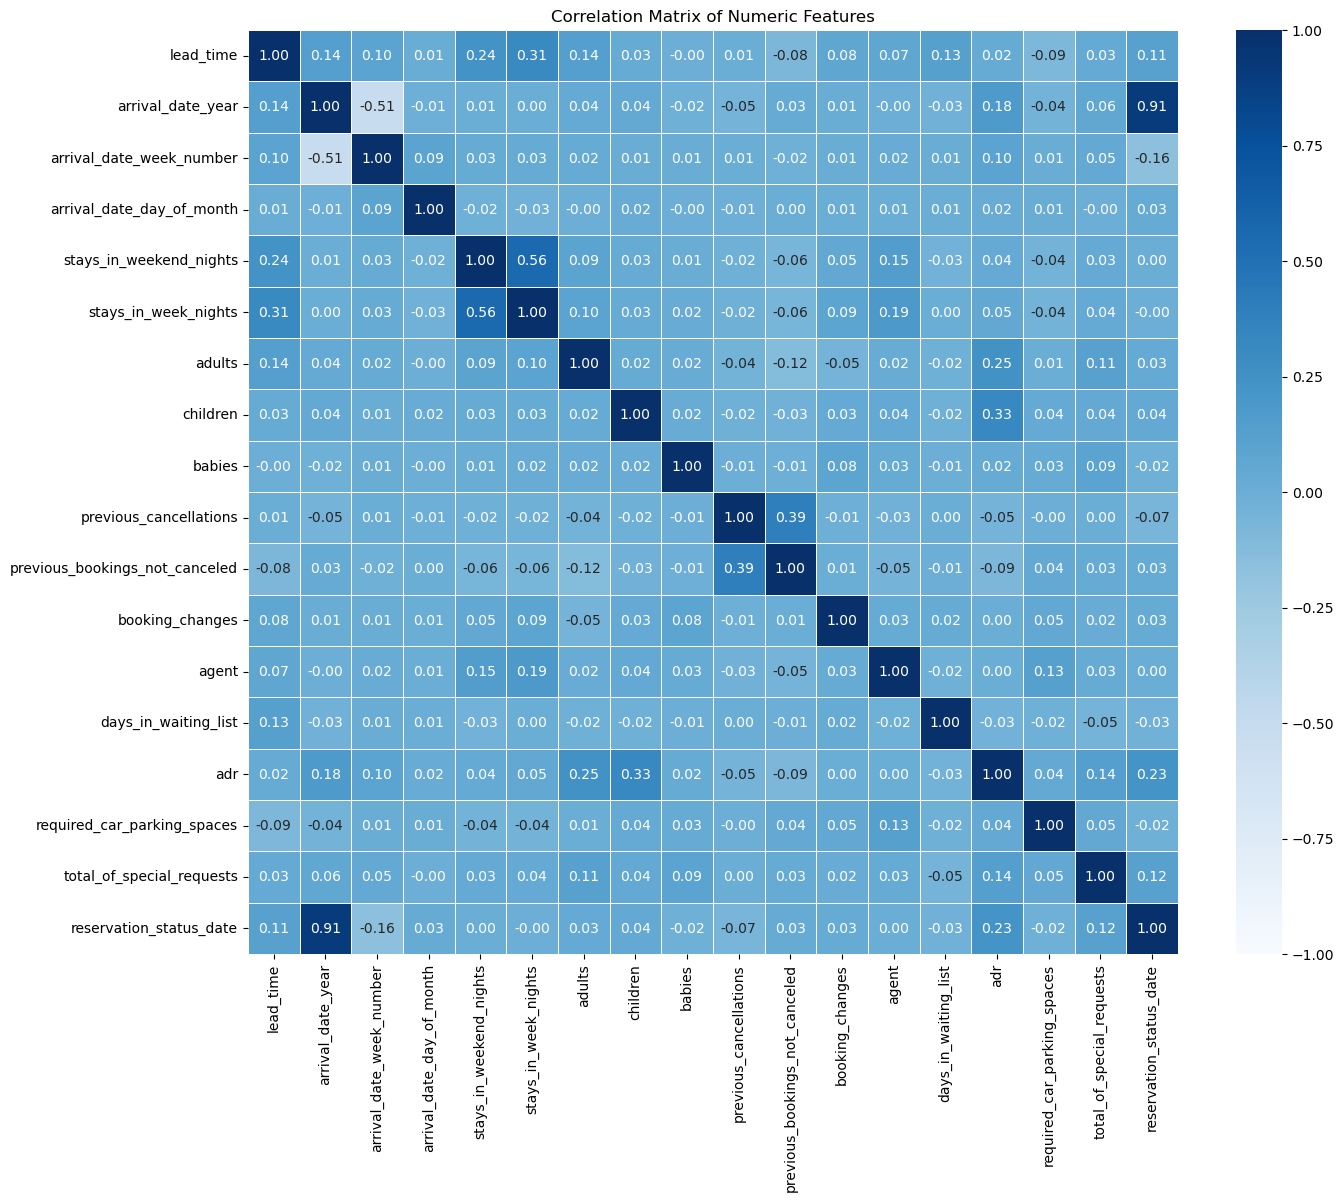

In [22]:
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5,cmap="Blues", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

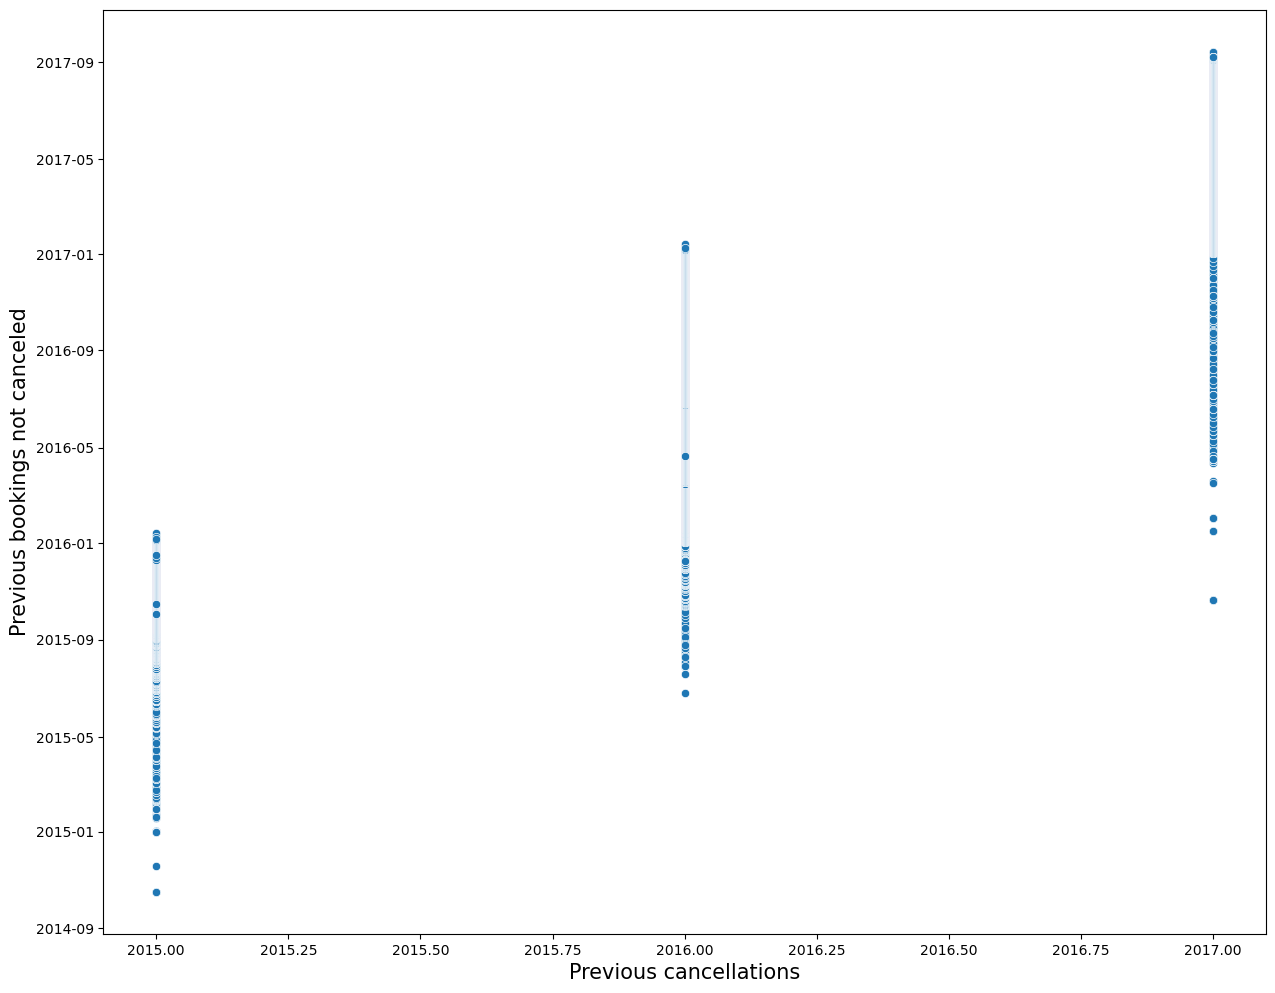

In [23]:
plt.figure(figsize=(15, 12))
sns.scatterplot(data=num_col_df, x="arrival_date_year", y="reservation_status_date")
plt.xlabel('Previous cancellations', size = 15)
plt.ylabel('Previous bookings not canceled', size = 15)
plt.show()

### **5. EDA 3D**

#### 📌 Tiền xử lý dữ liệu

**`1.`** Đầu tiên, ta tạo ra một DataFrame mới để tránh làm ảnh hưởng đến tập dữ liệu bên trên

In [24]:
EDA_3D_df = data.copy()
EDA_3D_df.shape

(87396, 31)

In [25]:
EDA_3D_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


**`2.`** Sau đó, ta tạo thêm thuộc tính mới để phục vụ cho quá trình phân tích dữ liệu:
- `total_stays` = `stays_in_weekend_nights` + `stays_in_week_nights`
- `total_people` = `adults` + `children` + `babies`

In [26]:
EDA_3D_df['total_stays'] = EDA_3D_df['stays_in_weekend_nights'] + EDA_3D_df['stays_in_week_nights']
EDA_3D_df['total_people'] = EDA_3D_df['adults'] + EDA_3D_df['children'] + EDA_3D_df['babies']

**`3.`** Ta thấy có một vài điểm dữ liệu có thuộc tính `total_people` bằng 0, điều này khá kỳ lạ. Do đó, ta sẽ xem đây là các dữ liệu nhiễu là loại bỏ các dòng này để tránh làm ảnh hưởng đến kết quả phân tích

In [27]:
EDA_3D_df['total_people'].unique()

array([ 2,  1,  3,  4,  5, 12, 40, 26, 50, 27, 55,  0, 20,  6, 10])

In [28]:
# Remove rows where total_people = 0
mask = (EDA_3D_df['total_people'] == 0)
EDA_3D_df = EDA_3D_df[~mask]

# Show the result
print(f">> Số điểm dữ liệu có `total_people` = 0: {(EDA_3D_df['total_people'] == 0).sum()}")

>> Số điểm dữ liệu có `total_people` = 0: 0


#### 📌 Phân tích và xử lý giá trị ngoại lai trên thuộc tính `adr` (sử dụng [phương pháp IQR](https://online.stat.psu.edu/stat200/lesson/3/3.2#:~:text=We%20can%20use%20the%20IQR,add%20this%20value%20to%20Q3.))

**`Bước 1:`** Đầu tiên, ta xác định giới hạn dưới và giới hạn trên của thuộc tính `adr` theo phương pháp IQR

In [29]:
# Calculate IQR and determine the lower bound 
#   and upper bound for `adr`
IQR = EDA_3D_df['adr'].quantile(0.75) \
        - EDA_3D_df['adr'].quantile(0.25)
adr_lower_bound = EDA_3D_df['adr'].quantile(0.25) - 1.5*IQR
adr_upper_bound = EDA_3D_df['adr'].quantile(0.75) + 1.5*IQR

print(f">> Giới hạn dưới của `adr`: {adr_lower_bound}")
print(f">> Giới hạn trên của `adr`: {adr_upper_bound}")

>> Giới hạn dưới của `adr`: -20.52499999999999
>> Giới hạn trên của `adr`: 226.875


**`Bước 2:`** Sau đó, ta kiểm tra xem thuộc tính `adr` có giá trị ngoại lai hay không? Nếu có thì đó là (những) giá trị nào?

In [30]:
# Construct rule for detecting all outliers
mask = (EDA_3D_df['adr'] >= adr_lower_bound) \
        & (EDA_3D_df['adr'] <= adr_upper_bound)

# Apply the rule to filter the outliers
EDA_3D_df.loc[~mask, 'adr'].sort_values(ascending=False)\
    .to_frame().head(5).style.background_gradient()

,adr
48515,5400.000000
111403,510.000000
15083,508.000000
103912,451.500000
13142,450.000000


> **Nhận xét**: Ta biết rằng giá trị ngoại lai không phải lúc nào cũng mang ý nghĩa tiêu cực và điều đó cũng đúng phần nào trong trường hợp này. Từ bảng kết quả, ta thấy chỉ có một điểm dữ liệu có giá trị tại thuộc tính `adr` lớn hơn 5000, cách rất xa phạm vi phân bố của các điểm dữ liệu còn lại. Trong khi đó, các giá trị ngoại lai khác thường có khoảng cách không quá xa so với giới hạn trên mà ta tìm được. Do đó, ta sẽ xử lý trường hợp này bằng cách: loại bỏ điểm dữ liệu có giá trị tại thuộc tính `adr` lớn hơn 5000 và giữ nguyên các điểm dữ liệu còn lại. 

**`Bước 3:`** Loại bỏ (các) điểm dữ liệu có giá trị tại thuộc tính `adr` lớn hơn 5000

In [31]:
mask = (EDA_3D_df['adr'] > 5000)
EDA_3D_df = EDA_3D_df[~mask]

#### 📌 Phân tích hệ số tương quan 

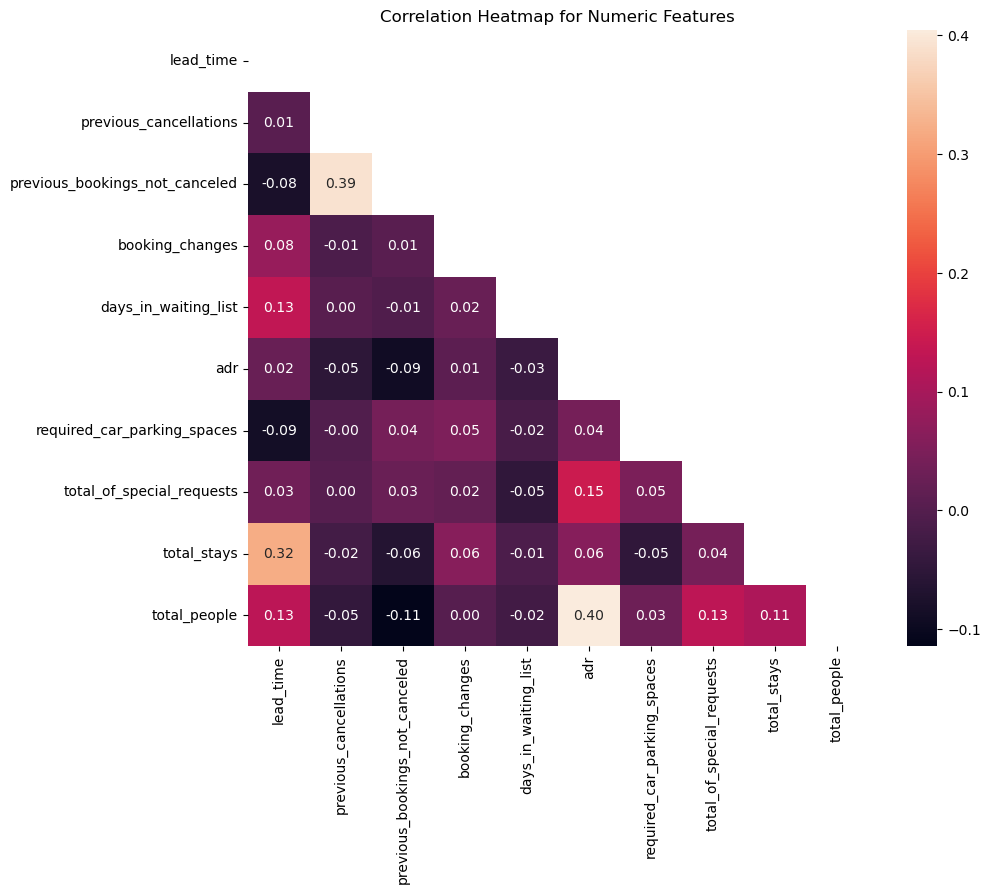

In [32]:
num_df = EDA_3D_df.select_dtypes(include=np.number)
cols = [
        'adults', 'children', 'babies', 'agent', 
        'arrival_date_year', 'arrival_date_week_number', 
        'arrival_date_day_of_month',
        'stays_in_weekend_nights','stays_in_week_nights',
        ]
num_df.drop(cols, axis=1, inplace=True)        
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(num_df.corr(), dtype=bool))
sns.heatmap(num_df.corr(), annot=True, fmt=".2f", 
            mask=mask)
plt.title("Correlation Heatmap for Numeric Features")
plt.show()

### 5.1. Sử dụng Scatter plot để phân tích dữ liệu 3D cho ba biến num

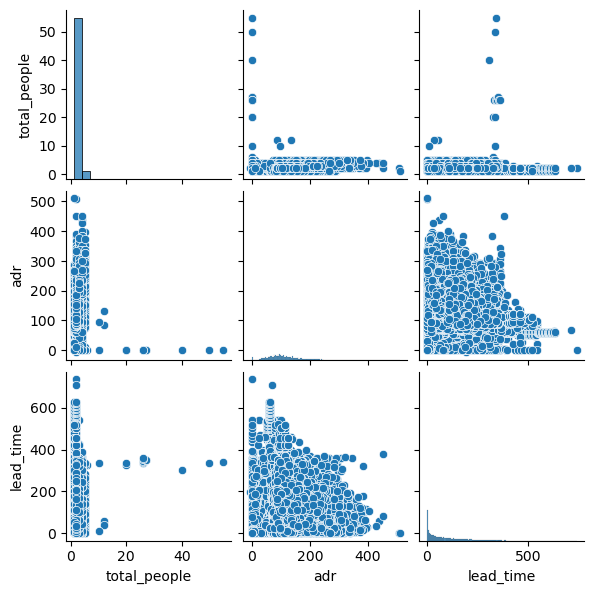

In [33]:
x_axis = 'total_people';
y_axis = 'adr';
z_axis = 'lead_time';
# plt.figure(figsize=(8, 8))
# plt.scatter(data['lead_time'], data['stays_in_weekend_nights']);
sns.pairplot(EDA_3D_df[[x_axis, y_axis, z_axis]], size=2)
plt.show()

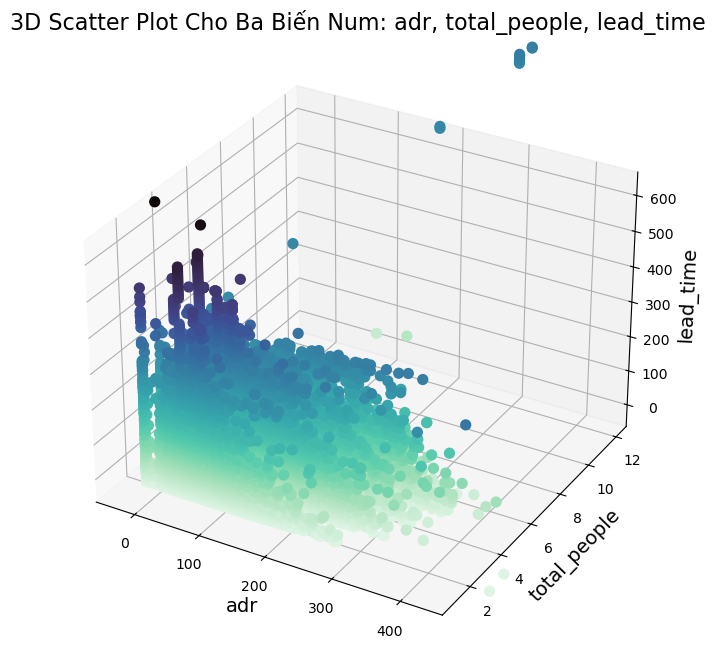

In [34]:
# Choose 3 numeric features for the 3D scatter plot
x_axis = 'adr';
y_axis = 'total_people';
z_axis = 'lead_time';

# Get the data for the 3D scatter plot
x_data = EDA_3D_df[x_axis]
y_data = EDA_3D_df[y_axis]
z_data = EDA_3D_df[z_axis]

# Create a 3D scatter plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x_data, y_data, z_data, c=z_data, 
           cmap=sns.color_palette(palette="mako_r", as_cmap=True), 
           alpha=0.99, s=50,
           )

# Zoom the plot in the interesting area
ax.set_ylim(0.5, 12.5)
ax.set_xlim(-50, 450)
ax.set_zlim(-50, 650)

# Set labels and title
ax.set_title(f"3D Scatter Plot Cho Ba Biến Num: {x_axis}, {y_axis}, {z_axis}",
             size=16)
ax.set_xlabel(x_axis, fontdict={'fontsize': 14}); 
ax.set_ylabel(y_axis, fontdict={'fontsize': 14}); 
ax.set_zlabel(z_axis, fontdict={'fontsize': 14});

plt.show()

>**Nhận xét**:  
>
>**(1)** Giữa `adr` và `total_people`:  
>- Ta thấy có mối tương quan theo chiều dương không quá mạnh giữa hai thuộc tính `adr` và `total_people`. Nhìn chung, khi số lượng người trong nhóm hành khách tăng lên thì khách sạn cũng thu được nhiều lợi nhuận hơn, do đó giá trị `adr` cũng cao hơn.
>
>- Tuy nhiên mối liên hệ này không phải lúc nào cũng đúng. Khi số lượng người trong nhóm hành khách vượt qua con số 5 thì lợi nhuận mà khách sạn thu được thường không quá ấn tượng, giá trị `adr` thường thấp hơn 100. Quan sát biểu đồ, ta thấy các nhóm hành khách đi từ 1 đến 5 người là nhóm khách hàng chủ yếu và đóng góp rất nhiều vào nguồn doanh thu của khách sạn.
>
>- Việc các nhóm hành khách đông người thường đem lại giá trị doanh thu không quá tốt có thể còn phụ thuộc vào các yếu tố khác như: loại bữa ăn, loại phòng, loại khách sạn, v.v. mà họ đã lựa chọn. Ngoài ra, số điểm dữ liệu thuộc vào nhóm này cũng không quá nhiều, nên ta cần được cung cấp thêm dữ liệu để có thể phân tích và làm sáng tỏ các xu hướng thú vị trong nhóm hành khách đông người.
>
>**(2)** Giữa `adr` và `lead_time`:  
>- Mối tương quan tuyến tính giữa hai thuộc tính `adr` và `lead_time` không quá rõ ràng. Nhìn chung, những hành khách có hẹn nhận phòng trong vòng một năm kể từ ngày đặt lịch (`lead_time` < 365) thường sẽ tạo ra doanh thu nhiều hơn cho khách sạn. Trong trường hợp khoảng thời gian giữa ngày đặt phòng và ngày nhận phòng vượt quá một năm, khi thời gian kéo dài càng lâu, ta thấy doanh thu của khách sạn có xu hướng giảm xuống.
>
>- Từ kết quả thống kê mà ta quan sát được, ta có thể đặt ra một câu hỏi: "Liệu rằng các hành khách có lịch hẹn sớm hơn một năm (`lead_time` > 365) sẽ nhận được nhiều chính sách ưu đãi hơn từ phía khách sạn?". Đây chỉ là một câu hỏi phỏng đoán để giúp ta lý giải mối tương quan giữa hai thuộc tính bên trên. Và ta chỉ có thể trả lời câu hỏi này nếu được cung cấp thông tin về chính sách ưu đãi của khách sạn. Như vậy, `lead_time` có thể không phải là một thuộc tính đủ tốt để sử dụng trong bài toán dự đoán doanh thu (`adr`) của khách sạn.
>
>**(3)** Giữa `total_people` và `lead_time`:  
>- Ta thấy có mối tương quan theo chiều dương khá yếu giữa hai thuộc tính `total_people` và `lead_time`. Nhìn chung, khi số lượng người trong nhóm hành khách tăng lên thì họ cũng có xu hướng đặt phòng sớm hơn (`lead_time` lớn). Điều này cũng không quá khó hiểu vì các nhóm hành khách đông người thường sẽ là: một đại gia đình, một nhóm bạn bè hoặc là các nhân viên trong một công ty, v.v.. Khi đi du lịch đông người mà ta không đặt hẹn với khách sạn từ sớm thì sẽ rất dễ xuất hiện tình trạng thiếu phòng và làm ảnh hưởng đến kế hoạch của cả nhóm. Do đó, để tránh những tình huống không may xảy ra, trong các chuyến du lịch đông người, hành khách sẽ có xu hướng đặt phòng khách sạn từ rất sớm, thường là gần một năm trước khi buổi du lịch diễn ra.


Text(0, 0.5, 'Median Population')

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


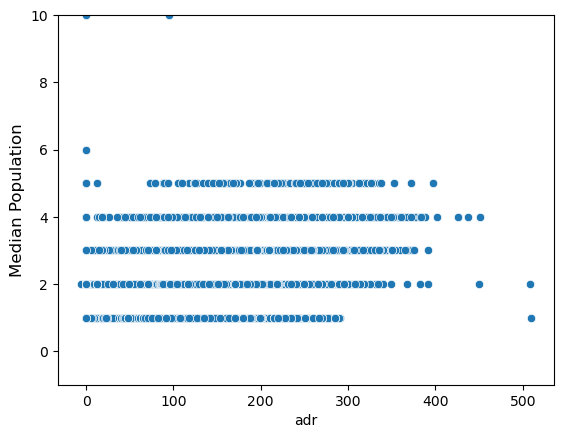

In [35]:
ax = sns.scatterplot(data=EDA_3D_df, x=x_axis, y=y_axis)
# plt.ylim(-50,650)
plt.ylim(-1,10)
# plt.xlim(-1,10)
ax.set_ylabel("Median Population", fontname="Arial", fontsize=12)

### 5.2. Sử dụng Scatter plot 2D và màu đối với hai biến num và cate

Ta sẽ sử dụng `hotel` là biến cate để phân tích điểm khác nhau giữa hai loại khách sạn 

In [36]:
cate_col = "hotel"
hotel_palette = {"City Hotel": "#34A798", "Resort Hotel": "#f76d61"}

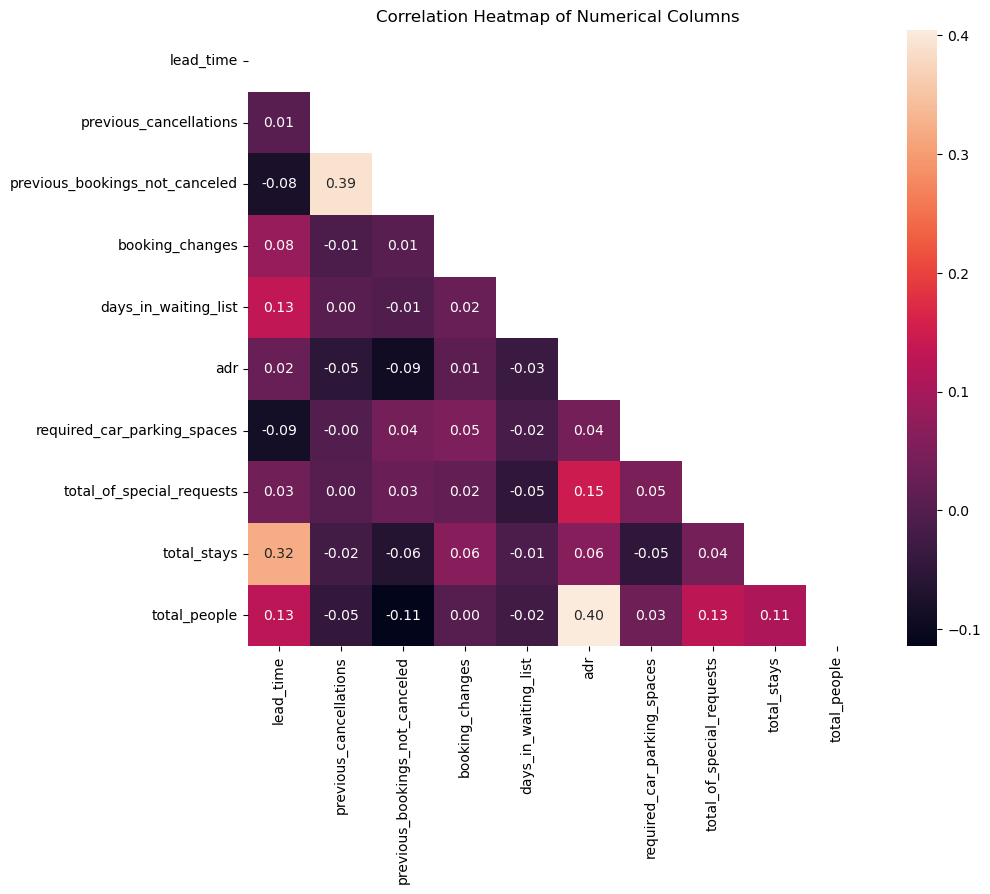

In [37]:
''' cate:
hotel, meal, country, market_segment, distribution_channel, 
reserved_room_type, assigned_room_type, is_repeated_guest
deposit_type, agent, customer_type, reservation_status
'''
''' num:
lead_time, previous_cancellations, previous_bookings_not_canceled,
booking_changes, days_in_waiting_list, adr, 
required_car_parking_spaces, total_of_special_requests,
total_stays, total_people
'''
num_cols = [
    "lead_time", "previous_cancellations", "previous_bookings_not_canceled",
    "booking_changes", "days_in_waiting_list", "adr", 
    "required_car_parking_spaces", "total_of_special_requests",
    "total_stays", "total_people"
]
# Calculate the correlation matrix
corr_matrix = EDA_3D_df[num_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=None, mask=mask)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

#### 5.2.1. Kết hợp `hotel` với hai biến num: `previous_cancellations` và `previous_bookings_not_canceled`

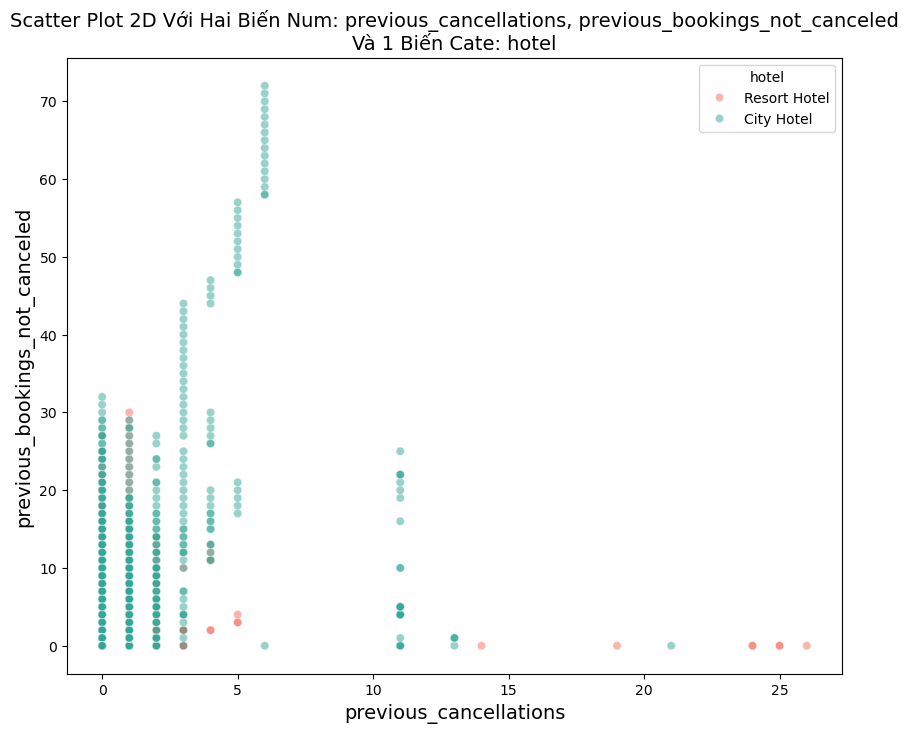

In [38]:
# cate_col = "hotel"
# hotel_palette = {"Resort Hotel": "#f76d61", "City Hotel": "#34A798"}

''' cate:
hotel, meal, country, market_segment, distribution_channel, 
reserved_room_type, assigned_room_type, is_repeated_guest
deposit_type, agent, customer_type, reservation_status
'''

x_axis = "previous_cancellations"
y_axis = "previous_bookings_not_canceled"

plt.figure(figsize=(10, 8))
ax = sns.scatterplot(
    data=EDA_3D_df, x=x_axis, y=y_axis, 
    hue=cate_col, 
    palette=hotel_palette,
    # s=10, 
    alpha=0.5
)

# Set labels and title
ax.set_title(f"Scatter Plot 2D Với Hai Biến Num: {x_axis}, {y_axis}\nVà 1 Biến Cate: {cate_col}",
             fontsize=14)
ax.set_xlabel(x_axis, fontsize=14)
ax.set_ylabel(y_axis, fontsize=14)

# Show the plot
plt.show()

>**Nhận xét**:
>
>Nhìn chung, mối tương quan giữa hai biến `previous_cancellations` và `previous_bookings_not_canceled` có nhiều nét tương đồng ở cả hai nhóm khách sạn `City Hotel` và `Resort Hotel`:
>
>- Đối với các hành khách chưa từng hủy đặt phòng hoặc có số lần hủy đặt phòng ít hơn 10 lần, ta thấy hai thuộc tính `previous_cancellations` và `previous_bookings_not_canceled` có mối tương quan theo chiều dương khá mạnh. Nhìn chung, các khách hàng đã nhiều lần hủy đặt phòng thì cũng có nhiều lần không hủy đặt phòng (tức là họ vẫn đến ở khách sạn như lịch hẹn từ trước). Do đó, việc hủy đặt phòng trong trường hợp này không thực sự đồng nghĩa với tình trạng hành khách đang "rời bỏ" khách sạn - tức là không tiếp tục sử dụng khách sạn này mà chuyển sang các khách sạn khác có nhiều chính sách, dịch vụ tốt hơn. Việc hành khách hủy đặt phòng có thể chỉ đơn giản là do họ bận một việc gì đó và không thể đến như lịch hẹn, v.v.. Và các người chủ khách sạn không nên quá lo lắng về chất lượng dịch vụ mà khách sạn của mình cung cấp.
>
>- Đối với các hành khách có số lần hủy đặt phòng nhiều hơn 10 lần, ta thấy hai thuộc tính `previous_cancellations` và `previous_bookings_not_canceled` có mối tương quan theo chiều âm không quá mạnh. Tức là, khi hành khách đã hủy đặt phòng quá nhiều lần ở một khách sạn thì họ có xu hướng là chưa từng đến khách sạn đó, hoặc chỉ mới đến khách sạn đó một vài lần (con số này nhỏ hơn rất nhiều so với số lần hủy đặt phòng). Nguyên nhân cho hiện tượng này có thể đến từ việc các hành khách có việc bận đột xuất, không thể tiến hành buổi đi chơi theo kế hoạch và phải hủy đặt phòng tại khách sạn. Hoặc cũng có thể là do hành khách đã tìm được một khách sạn có chất lượng dịch vụ tốt hơn, giá cả cạnh tranh hơn, v.v. đáp ứng được các yêu cầu của họ và họ quyết định hủy lịch hẹn tại khách sạn đã đặt lịch trước đó. Tuy nhiên, các nhận định bên trên chỉ mang tính giả thuyết chứ không có một cơ sở cụ thể nào cả. Nhưng việc phân tích các hành khách có nhiều lần hủy đặt phòng sẽ là một bài toán thú vị mà các người chủ dịch vụ khách sạn có thể cân nhắc và tiến hành phân tích trong tương lai để làm rõ nguyên nhân dẫn đến hiện tượng này.
>
>Điểm khác nhau cơ bản giữa hai nhóm `City Hotel` và `Resort Hotel` đến từ phạm vi phân bố của các điểm dữ liệu:
>
>- Đối với thuộc `previous_cancellations`, tuy các điểm dữ liệu của hai nhóm đều tập trung chủ yếu trong đoạn [0, 5], nhưng nhóm `Resort Hotel` có phạm vi phân bố rộng hơn một chút so với nhóm `City Hotel`. Tuy nhiên, trung bình `previous_cancellations` của `City Hotel` cao hơn trung bình `previous_cancellations` của `Resort Hotel`. Điều này cho thấy tình trạng hành khách hủy đặt phòng sẽ diễn ra phổ biến hơn ở các khách sạn `City Hotel`. Ngược lại, `Resort Hotel` sẽ có số lần hủy đặt phòng bởi cùng một khách hàng nhiều hơn.
>
>- Đối với thuộc `previous_bookings_not_canceled`, các điểm dữ liệu của nhóm `Resort Hotel` thường tập trung trong đoạn [0, 30]. Trong khi đó, nhóm `City Hotel` lại có phạm vi phân bố rộng hơn khá nhiều, ta thấy các điểm dữ liệu phân bố khá đều trong đoạn [0, 70].
>
>Như vậy, thông qua tập dữ liệu, ta thấy các khách sạn thuộc loại `Resort Hotel` thường gặp phải tình trạng hành khách hủy đặt phòng rất nhiều lần. Ngược lại, các hành khách đã ở khách sạn thuộc loại `City Hotel` thường có xu hướng quay trở lại khách sạn này vào các lần tiếp theo. Các `City Hotel` thường tọa lạc ở khu vực thành thị, chẳng hạn như các quận trung tâm thành phố hoặc khu thương mại của các thành phố lớn, v.v.. Có thể chính sự tập nập, náo nhiệt ở nơi đây là một điểm cộng rất lớn và thu hút du khách trở lại nơi đây trong tương lai.
>

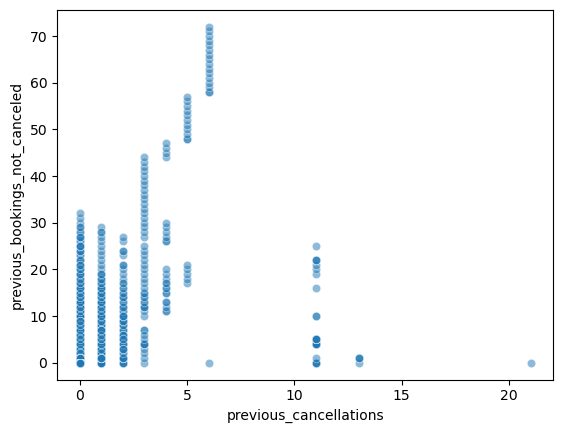

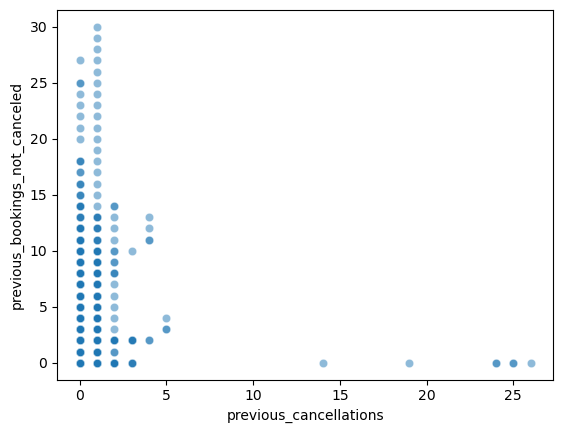

In [39]:
my_df = EDA_3D_df[EDA_3D_df['hotel'] == 'City Hotel']
'''City Hotel      53273
Resort Hotel'''
sns.scatterplot(data=my_df, x=x_axis, y=y_axis, alpha=0.5)
plt.show()

my_df = EDA_3D_df[EDA_3D_df['hotel'] == 'Resort Hotel']
'''City Hotel      53273
Resort Hotel'''
sns.scatterplot(data=my_df, x=x_axis, y=y_axis, alpha=0.5)
plt.show()

#### 5.2.2. Kết hợp `hotel` với hai biến num: `total_stays` và `lead_time`

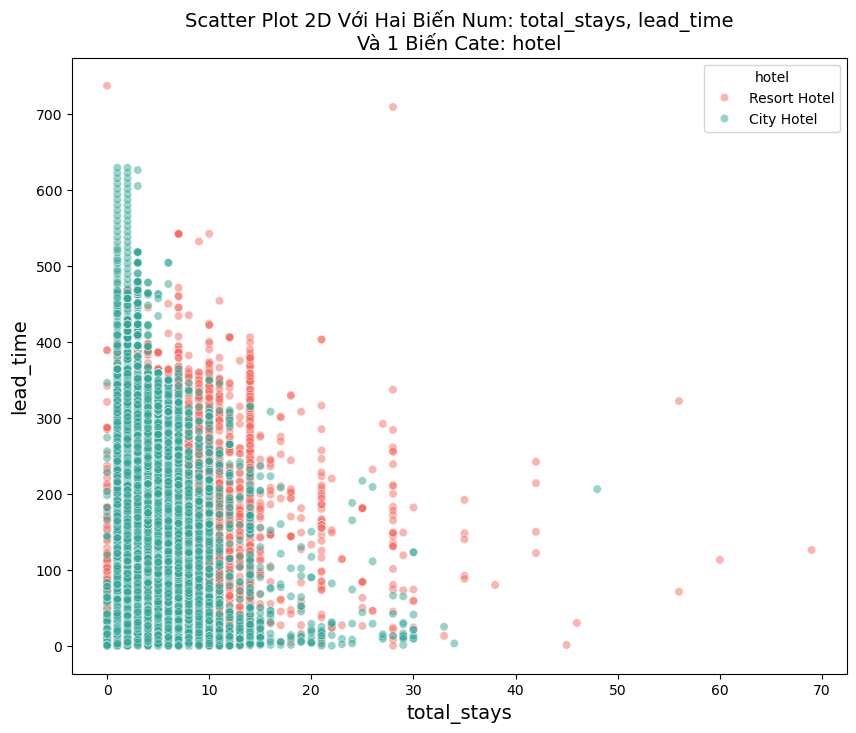

In [40]:
# cate_col = "hotel"
# hotel_palette = {"Resort Hotel": "#f76d61", "City Hotel": "#34A798"}

''' cate:
hotel, meal, country, market_segment, distribution_channel, 
reserved_room_type, assigned_room_type, is_repeated_guest
deposit_type, agent, customer_type, reservation_status
'''

x_axis = "total_stays"
y_axis = "lead_time"

plt.figure(figsize=(10, 8))
ax = sns.scatterplot(
    data=EDA_3D_df, x=x_axis, y=y_axis, 
    hue=cate_col, 
    palette=hotel_palette,
    # s=10, 
    alpha=0.5
)

# Set labels and title
ax.set_title(f"Scatter Plot 2D Với Hai Biến Num: {x_axis}, {y_axis}\nVà 1 Biến Cate: {cate_col}",
             fontsize=14)
ax.set_xlabel(x_axis, fontsize=14)
ax.set_ylabel(y_axis, fontsize=14)

# Show the plot
plt.show()

>**Nhận xét**:
>
>Ở cả hai nhóm `City Hotel` và `Resort Hotel`:
>
>- Nhìn chung, hai thuộc tính `total_stays` và `lead_time` có mối tương quan nhẹ theo chiều dương. Nghĩa là, nếu các hành khách có ý định đi du lịch thì họ thường có xu hướng lên kế hoạch và đặt phòng khách sạn từ rất sớm để tránh tình trạng hết phòng, dẫn đến giá trị `lead_time` trong các mẫu dữ liệu này cũng lớn hơn.
>
>Xét nhóm `City Hotel`:
>
>- Phần lớn hành khách ở các `City Hotel` thường có thời gian lưu trú trong khoảng 10 ngày, tuy xuất hiện một vài hành khách có thời gian lưu trú dài hơn một chút (khoảng hơn 1 tháng) nhưng số lượng mẫu dữ liệu này là khá ít. Đồng thời, ta cũng phát hiện rằng khoảng thời gian kể từ ngày đặt phòng đến ngày nhận phòng của các hành khách này thường không vượt quá một năm (365 ngày).
>
>- Tuy nhiên, ta thấy xuất hiện khá nhiều hành khách có thời gian đặt phòng sớm hơn ít nhất 400 ngày. Đây là một nhóm các khách hàng thú vị mà ta nên dành thêm thời gian để phân tích lý do vì sao mà họ lại đặt phòng từ rất sớm như vậy. Đó có thể là các công ty muốn đặt phòng để chuẩn bị cho chuyến đi du lịch của nhân viên, v.v.. Hiểu rõ hơn về đặc điểm của nhóm hành khách này có thể giúp khách sạn đưa ra nhiều chính sách ưu đãi hấp dẫn để thu hút sự quan tâm từ các công ty lớn, từ đó giúp gia tăng doanh thu cho khách sạn.
>
>Xét nhóm `Resort Hotel`:
>
>- Nhìn chung, thời gian lưu trú của hành khách ở các khách sạn thuộc loại `Resort Hotel` thường sẽ kéo dài lâu hơn so với `City Hotel`. Phần lớn hành khách ở các `Resort Hotel` sẽ có thời gian nghỉ dưỡng kéo dài trong khoảng nửa tháng (15 ngày). Tuy nhiên, cũng có rất nhiều hành khách lựa chọn lưu trú tại khách sạn từ 1 đến 2 tháng. Điều này cũng hoàn toàn hợp lý với mục đích "nghỉ dưỡng" như trong tên gọi của loại khách sạn này (Resort Hotel).
>
>- So với `City Hotel`, thời gian đặt phòng của hành khách ở các khách sạn `Resort Hotel` thường có độ dao động không quá lớn. Gần như toàn bộ các hành khách đều có lịch đặt phòng ít hơn 400 ngày (`lead_time` < 400). Tuy có một vài điểm dữ liệu vượt qua khỏi ngưỡng 400, nhưng số lượng này là không đáng kể.
>

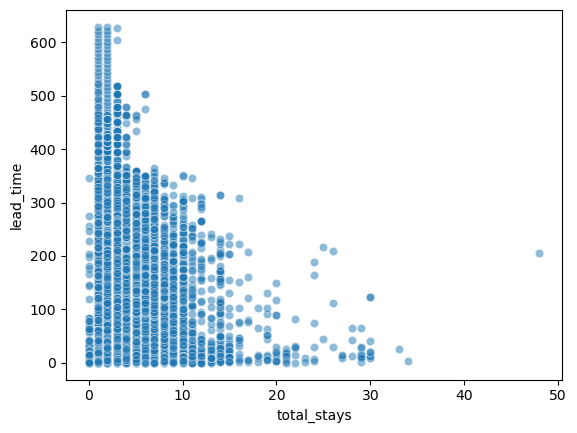

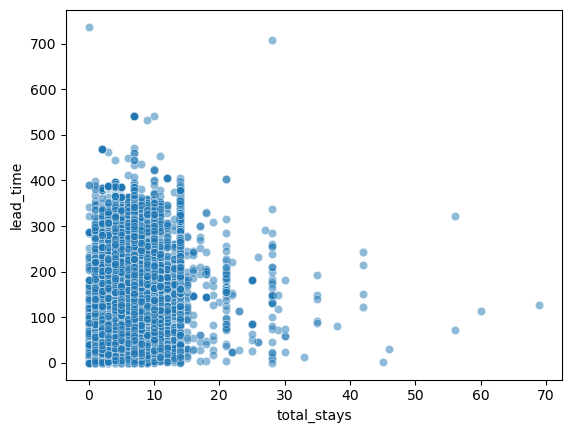

In [41]:
my_df = EDA_3D_df[EDA_3D_df['hotel'] == 'City Hotel']
sns.scatterplot(data=my_df, x=x_axis, y=y_axis, alpha=0.5)
plt.show()

my_df = EDA_3D_df[EDA_3D_df['hotel'] == 'Resort Hotel']
sns.scatterplot(data=my_df, x=x_axis, y=y_axis, alpha=0.5)
plt.show()

#### 5.2.3. Kết hợp `hotel` với hai biến num: `total_stays` và `adr`

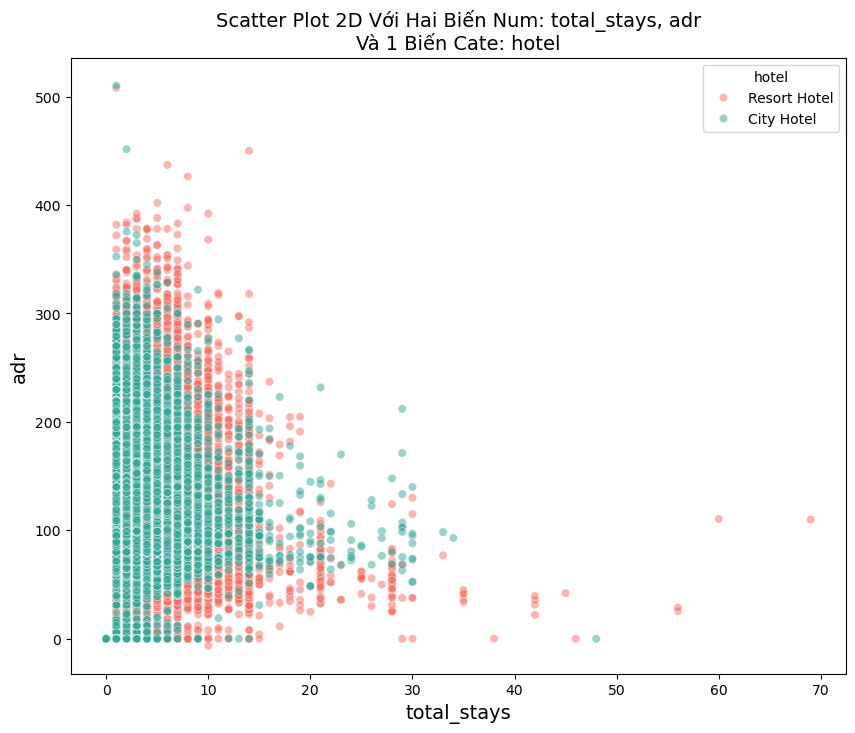

In [42]:
# cate_col = "hotel"
# hotel_palette = {"Resort Hotel": "#f76d61", "City Hotel": "#34A798"}

''' cate:
hotel, meal, country, market_segment, distribution_channel, 
reserved_room_type, assigned_room_type, is_repeated_guest
deposit_type, agent, customer_type, reservation_status
'''

x_axis = "total_stays"
y_axis = "adr"

plt.figure(figsize=(10, 8))
ax = sns.scatterplot(
    data=EDA_3D_df, x=x_axis, y=y_axis, 
    hue=cate_col, 
    palette=hotel_palette,
    # s=10, 
    alpha=0.5
)

# Set labels and title
ax.set_title(f"Scatter Plot 2D Với Hai Biến Num: {x_axis}, {y_axis}\nVà 1 Biến Cate: {cate_col}",
             fontsize=14)
ax.set_xlabel(x_axis, fontsize=14)
ax.set_ylabel(y_axis, fontsize=14)

# Show the plot
plt.show()

>**Nhận xét**:
>
>- Quan sát biểu đồ phân tán (Scatter plot), ta thấy rằng khi giá trị của thuộc tính `total_stays` tăng lên thì giá trị của thuộc tính `adr` có xu hướng giảm xuống. Nghĩa là, khi các hành khách có thời gian lưu trú lâu hơn tại khách sạn thì lợi nhuận mà khách sạn thu được sẽ có xu hướng giảm xuống.
>
>- Câu "lợi nhuận có xu hướng giảm xuống" không đồng nghĩa với việc khách sạn bị lỗ vốn khi cung cấp dịch vụ cho một khách hàng nào đó. Mà câu bên trên nên được hiểu theo nghĩa là khách sạn thu được số tiền ít hơn (từ hành khác có thời gian lưu trú dài) so với số tiền mà khách sạn kiếm được từ các hành khách có thời gian lưu trú ngắn hơn.
>
>- Như vậy, các hành khách ở lại khách sạn lâu hơn thường có được các "thỏa thuận" tốt hơn từ phía khách sạn. Do đó, nếu một đại gia đình muốn tổ chức chuyến đi du lịch cho tất cả thành viên thì nên lựa chọn các chuyến đi dài ngày và ở lại một khách sạn lâu hơn để có thể tiết kiệm chi phí.
>
>- Mặt khác, nhìn vào thuộc tính `total_stays`, ta thấy hành khách thường lựa chọn các `City Hotel` trong các chuyến đi ngắn ngày. Nhưng đối với các chuyến đi dài ngày, các khách sạn thuộc nhóm `Resort Hotel` thường được ưu ái hơn.
>

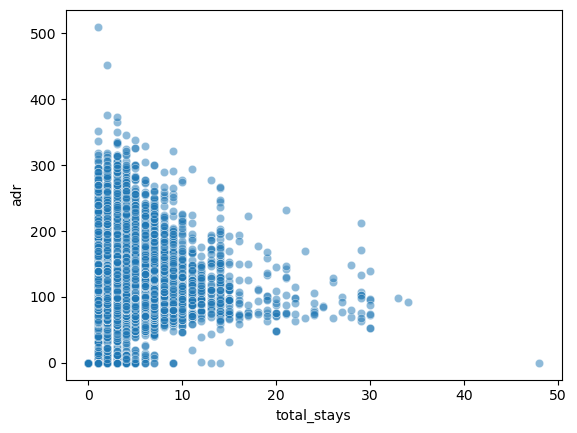

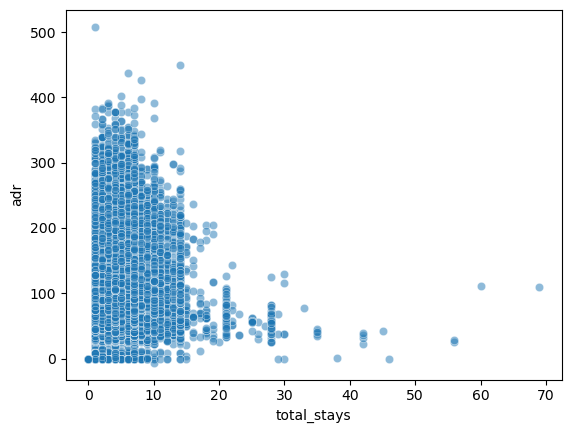

In [43]:
my_df = EDA_3D_df[EDA_3D_df['hotel'] == 'City Hotel']
sns.scatterplot(data=my_df, x=x_axis, y=y_axis, alpha=0.5)
plt.show()

my_df = EDA_3D_df[EDA_3D_df['hotel'] == 'Resort Hotel']
sns.scatterplot(data=my_df, x=x_axis, y=y_axis, alpha=0.5)
plt.show()

#### 5.2.4. Kết hợp `hotel` với hai biến num: `total_of_special_requests` và `adr`

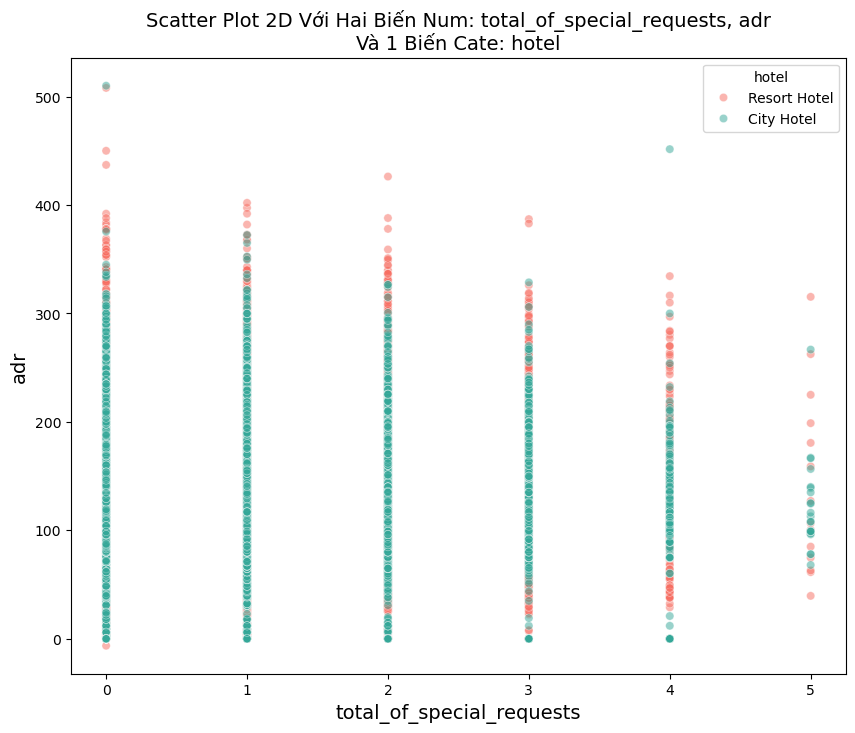

In [44]:
# cate_col = "hotel"
# hotel_palette = {"Resort Hotel": "#f76d61", "City Hotel": "#34A798"}

''' cate:
hotel, meal, country, market_segment, distribution_channel, 
reserved_room_type, assigned_room_type, is_repeated_guest
deposit_type, agent, customer_type, reservation_status
'''

x_axis = "total_of_special_requests"
y_axis = "adr"

plt.figure(figsize=(10, 8))
ax = sns.scatterplot(
    data=EDA_3D_df, x=x_axis, y=y_axis, 
    hue=cate_col, 
    palette=hotel_palette,
    # s=10, 
    alpha=0.5
)

# Set labels and title
ax.set_title(f"Scatter Plot 2D Với Hai Biến Num: {x_axis}, {y_axis}\nVà 1 Biến Cate: {cate_col}",
             fontsize=14)
ax.set_xlabel(x_axis, fontsize=14)
ax.set_ylabel(y_axis, fontsize=14)

# Show the plot
plt.show()

>**Nhận xét**:
>
>- Quan sát biểu đồ, ta thấy hai thuộc tính `total_of_special_requests` và `adr` có mối tương quan thuận không quá mạnh. Nhìn chung, khi số lượng yêu cầu đặc biệt của hành khách tăng lên thì khách sạn càng kiếm được nhiều doanh thu. Điều này cho thấy khách sạn nên tạo thêm điều kiện và cố gắng đáp ứng càng nhiều yêu cầu đặc biệt từ khách hàng càng tốt. Vì hành khách yêu cầu nhiều dịch vụ đặc biệt có thể sẵn lòng trả giá cao hơn cho chỗ ở của họ. Những yêu cầu này có thể bao gồm nâng cấp phòng, tiện nghi đặc biệt hoặc dịch vụ cá nhân hóa, v.v.. Tất cả đều có thể tạo ra chi phí bổ sung và đóng góp vào doanh thu của khách sạn. Đây có thể xem là một loại hình dịch vụ đầy hứa hẹn và có thể đóng góp rất nhiều vào doanh thu của cả khách sạn.
>
>- Nhóm `City Hotel` có giá trị `total_of_special_requests` trung bình cao hơn so với giá trị `total_of_special_requests` trung bình của nhóm `Resort Hotel`. Tuy nhiên, về mặt doanh thu, các khách sạn thuộc nhóm `Resort Hotel` thường có xu hướng kiếm được nhiều tiền hơn từ các yêu cầu đặc biệt của hành khách so với các khách sạn trong nhóm `City Hotel`. Việc này có thể xuất phát từ nhiều nguyên nhân, và một trong số đó có thể là do khách lưu trú tại `Resort Hotel` thường có những kỳ vọng và sở thích khác với những người khách lưu trú tại `City Hotel`. Trong khách sạn nghỉ dưỡng, hành khách có thể đưa ra yêu cầu đặc biệt về các hoạt động, tiện nghi hoặc trải nghiệm độc đáo ở khu nghỉ dưỡng, chẳng hạn như trị liệu spa, thuê thiết bị thể thao dưới nước, các chuyến tham quan có hướng dẫn viên hoặc sử dụng các tiện nghi giải trí như sân gôn hoặc dốc trượt tuyết. Những dịch vụ và hoạt động chuyên biệt này có thể đi kèm với chi phí liên quan rất cao, do đó làm tăng giá trị `adr` lên đáng kể.
>
>- Sau khi hiểu được tác động của các yêu cầu đặc biệt lên doanh thu của khách sạn, các quản lý khách sạn có thể tổng hợp tất cả yêu cầu đặc biệt từ những hành khách của mình trong quá khứ. Từ đó phân tích, xem xét những yêu cầu được xuất hiện phổ biến và đưa yêu cầu đó thành một trong những dịch vụ mà khách sạn cung cấp sẵn. Vì yêu cầu được xuất hiện nhiều lần đồng nghĩa với việc các hành khách cũ có vẻ quan tâm nhiều đến dịch vụ đó, và có thể các hành khách mới trong tương lai cũng sẽ thích dịch vụ này. Do đó, việc cung cấp sẵn dịch vụ từng được nhiều người yêu cầu sẽ trở thành một ưu điểm lớn trong việc thu hút các hành khách mới đến thuê phòng ở khách sạn. Đó chính là một món vũ khí bí mật giúp gia tăng sức cạnh tranh của khách sạn trên thương trường vô cùng khốc liệt.
>

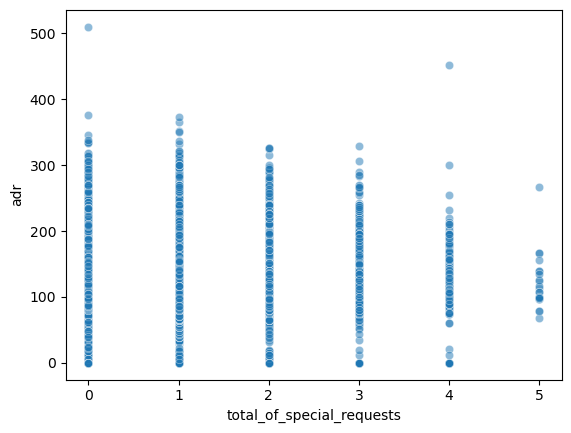

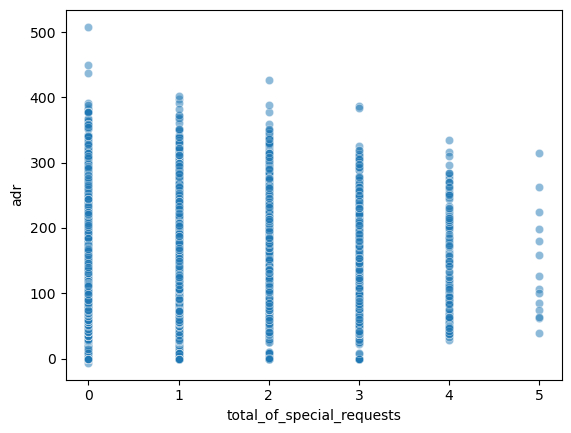

In [45]:
my_df = EDA_3D_df[EDA_3D_df['hotel'] == 'City Hotel']
sns.scatterplot(data=my_df, x=x_axis, y=y_axis, alpha=0.5)
plt.show()

my_df = EDA_3D_df[EDA_3D_df['hotel'] == 'Resort Hotel']
sns.scatterplot(data=my_df, x=x_axis, y=y_axis, alpha=0.5)
plt.show()

In [46]:
EDA_3D_df.groupby('hotel')[['total_of_special_requests','adr']].mean()

,total_of_special_requests,adr
hotel,,
City Hotel,0.711486,111.172693
Resort Hotel,0.679261,99.059517


### 5.3. Tính tỷ trọng theo bin chia theo thể loại với hai biến cate

In [47]:
import pandas as pd
# Define the variables
cate_1 = 'hotel';
cate_2 = 'assigned_room_type';
num_col = 'adr';

# Get the data
my_df = EDA_3D_df[[cate_1, cate_2, num_col]]

# Discritize the numerical variable into bins
## Define the number of bins
total_bins = 4

## Calculate the range of the numerical variable
num_col_range  = my_df[num_col].max() - my_df[num_col].min()

## Calculate the interval size
interval_size  = int(np.ceil(num_col_range / total_bins))

## Calculate the lower and upper interval
lower_interval = int(np.floor(my_df[num_col].min()))
upper_interval = int(np.ceil( my_df[num_col].max()))

## Create the intervals
intervals = [lower_interval + i * interval_size 
             for i in range(total_bins + 1)]

# Convert the continuous column values to numeric bin values
num_col_bins = pd.cut(
    x=my_df[num_col], 
    bins=intervals, 
    include_lowest=True,
)

# Group data by categories and create bins for numerical variable
grouped = my_df.groupby([cate_1, cate_2, num_col_bins])

# Calculate counts
counts = grouped.size().unstack(fill_value=0)

# Drop rows have all zeros
mask = (counts.sum(axis=1) == 0)
counts = counts[~mask]

# Calculate proportions
proportions = counts.div(counts.sum(axis=1), axis=0)

# Change column names
proportions.columns.name = proportions.columns.name + "_bins"

# Format and display the result
proportions.round(3).style.background_gradient()

>**Nhận xét**:
>
>**(1)** Xét nhóm khách sạn `City Hotel` (với 8 mã phòng khác nhau):
>
>- Với các mã phòng `A`, `B`, `C` và `K`: Trong số các hành khách đến lưu trú tại khách sạn thuộc nhóm `City Hotel` và được sắp xếp vào ở một trong các phòng `A`, `B`, `C` hoặc `K`, ta thấy có khoảng 80% hành khách sẽ tạo ra giá trị doanh thu rơi vào khoảng (-7.001, 123.0]. Có khoảng 20% hành khách tạo ra doanh thu trong khoảng (123.0, 253.0]. Và có rất ít hành khách (hoặc thậm chí không có hành khách nào) trong nhóm này tạo ra giá trị `adr` lớn hơn 253 cho các khách sạn `City Hotel`.
>
>- Với các mã phòng `D`, `E` và `F`: Trong số các hành khách đến lưu trú tại khách sạn thuộc nhóm `City Hotel` và được sắp xếp vào ở một trong các phòng `D`, `E` hoặc `F`, ta thấy có hơn một nửa số hành khách tạo ra giá trị doanh thu rơi vào khoảng (123.0, 253.0]. Các hành khách còn lại chủ yếu sẽ đem lại ít doanh thu hơn cho khách sạn, giá trị `adr` thuộc đoạn (-7.001, 123.0]. Tuy có một số ít hành khách tạo ra giá trị `adr` lớn hơn 253 nhưng số lượng mẫu dữ liệu này là quá ít nên ta sẽ không đề cập chi tiết.
>
>- Đặc biệt nhất là mã phòng `G`: Trong số các hành khách lưu trú tại khách sạn thuộc loại `City Hotel` và được sắp xếp ở phòng có mã `G`, ta thấy có hơn 56% hành khách tạo ra giá trị `adr` dao động trong khoảng (123.0, 253.0]. Nổi bật nhất là có hơn 20% hành khách tạo ra giá trị `adr` rơi vào khoảng (253.0, 383.0]. Phần lớn các hành khách còn lại sẽ đem lại doanh thu trung bình rơi vào khoảng (-7.001, 123.0]. Như vậy, mã phòng `G` là loại phòng có nhiều tiềm năng đem lại nhiều thu nhập cho khách sạn.
>
>- Như vậy, với các khách sạn trong nhóm `City Hotel`, các chủ khách sạn có thể tăng thêm số lượng phòng có mã `F` và `G` để có thể tối đa hóa doanh thu cho khách sạn.
>
>**(2)** Xét nhóm khách sạn `Resort Hotel` (với 10 mã phòng khác nhau):
>
>- Với các mã phòng `A`, `B`, `D`, `E`, `I` và `L`: Trong số các hành khách đến lưu trú tại khách sạn thuộc nhóm `Resort Hotel` và được sắp xếp vào ở một trong các phòng `A`, `B`, `D`, `E`, `I` hoặc `L`, ta thấy phần lớn hành khách sẽ tạo ra giá trị doanh thu trung bình ở bin thứ nhất, giá trị `adr` rơi vào khoảng (-7.001, 123.0]. Chỉ có một lượng nhỏ hành khách có thể tạo ra giá trị `adr` rơi vào khoảng (123.0, 253.0] và có rất ít hành khách có thể tạo ra giá trị `adr` lớn hơn 253.
>
>- Với các mã phòng `C` và `F`: Trong số các hành khách đến lưu trú tại khách sạn thuộc nhóm `Resort Hotel` và được sắp xếp vào ở một trong các phòng `C` hoặc `F`, ta thấy có khoảng 60% hành khách tạo ra giá trị `adr` trong khoảng (-7.001, 123.0]. Có khoảng hơn 30% hành khách tạo ra giá trị `adr` trong khoảng (123.0, 253.0]. Đồng thời, cũng có khoảng 5% hành khách tạo ra doanh thu nhiều hơn cho khách sạn, giá trị `adr` lớn hơn 253.
>
>- Đặc biệt nhất là mã phòng `G` và `H`: Phần lớn hành khách lưu trú tại các khách sạn thuộc nhóm `Resort Hotel` và ở một trong các mã phòng `G` hoặc `H` thường đem lại rất nhiều lợi nhuận cho khách sạn. Có khoảng 50% hành khách tạo ra lợi nhuận ở mức (bin) 2, giá trị `adr` thuộc đoạn (123.0, 253.0]. Đồng thời có khoảng 15% hành khách tạo ra lợi nhuận ở mức (bin) 3 và 4, giá trị `adr` lớn hơn 253.
>
>- Như vậy, với các khách sạn trong nhóm `Resort Hotel`, các chủ khách sạn có thể tăng thêm số lượng phòng có mã `H`, `G`, `C` và `F` để có thể tối đa hóa doanh thu cho khách sạn.
>

### **6. Insight**